In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data= pd.read_csv('dataset/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X= data.iloc[:,2: 4]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
Y= data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2,random_state= 2)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler= StandardScaler()

In [9]:
# for larger value difference we loose more data as compare to small value data # euclidiean distace 

In [10]:
X_train= scaler.fit_transform(X_train) #reducing the value proportionately to increase the accuracy in finding nearest neighbour 

In [11]:
X_test= scaler.fit_transform(X_test) #reducing the value proportionately to increase the accuracy in finding nearest neighbour 

In [12]:
X_train

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

## Data Insight

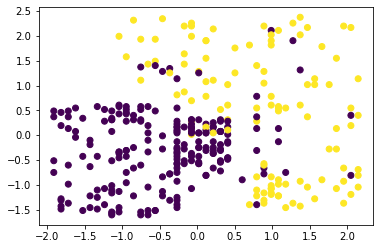

In [13]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train) # purple is zeroes  and yellow is ones #Binary Classification

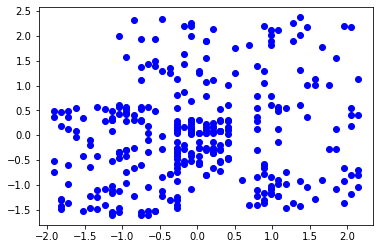

In [14]:
plt.scatter(X_train[:,0], X_train[:,1], color="blue")

In [15]:
unique, counts = np.unique(Y_train, return_counts=True)

result = np.column_stack((unique, counts)) 
result # number of 0's is 209 and number of 1's is 111

array([[  0, 209],
       [  1, 111]])


## Finding K vavlue 
-method 1: k= square root of no of tuble in training data 

In [16]:
k= np.sqrt(X_train.shape[0])
k

17.88854381999832

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn= KNeighborsClassifier(n_neighbors= 17)

In [19]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [20]:
Y_pred= knn.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [21]:
X_test

array([[-0.74651519,  0.33929263],
       [-1.48154554, -1.59952242],
       [-0.01148485, -0.52883351],
       [-0.74651519,  0.10779233],
       [ 1.55045463, -0.03689536],
       [ 0.90730308, -1.48377227],
       [-1.29778795,  0.3103551 ],
       [-0.83839399, -1.13652181],
       [ 0.26415153, -0.32627074],
       [-0.10336364,  1.58360677],
       [-1.20590916, -1.39695965],
       [-1.38966674, -1.2812095 ],
       [-0.47087881,  1.32316893],
       [ 0.7235455 ,  0.22354248],
       [-0.19524244, -0.35520828],
       [-0.37900002, -0.81820889],
       [-1.66530312, -0.03689536],
       [ 2.10172739, -0.84714643],
       [ 1.45857584,  0.02097972],
       [-1.02215157, -0.81820889],
       [-0.01148485,  0.19460494],
       [ 0.7235455 , -0.76033381],
       [-0.6546364 , -0.26839567],
       [-0.10336364, -1.10758427],
       [-1.11403037,  0.25248002],
       [ 0.7235455 , -1.13652181],
       [ 0.7235455 , -1.42589719],
       [ 0.26415153, -0.41308336],
       [ 0.6316667 ,

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
accuracy_score(Y_test, Y_pred)

0.925

In [24]:
confusion_matrix(Y_test, Y_pred)

array([[46,  2],
       [ 4, 28]])

## Finding K vavlue 
-method 2: test for different value of k, which gives maximum accuracy  

In [25]:
for i in  range(1, 50):
    
    knn= KNeighborsClassifier(n_neighbors= i)
    
    knn.fit(X_train, Y_train)
    
    Y_pred= knn.predict(X_test)
    
    print("K =",i," , accuracy = ",accuracy_score(Y_test, Y_pred)*100)
    

K = 1  , accuracy =  88.75
K = 2  , accuracy =  82.5
K = 3  , accuracy =  88.75
K = 4  , accuracy =  85.0
K = 5  , accuracy =  87.5
K = 6  , accuracy =  88.75
K = 7  , accuracy =  90.0
K = 8  , accuracy =  88.75
K = 9  , accuracy =  90.0
K = 10  , accuracy =  90.0
K = 11  , accuracy =  92.5
K = 12  , accuracy =  92.5
K = 13  , accuracy =  92.5
K = 14  , accuracy =  92.5
K = 15  , accuracy =  92.5
K = 16  , accuracy =  93.75
K = 17  , accuracy =  92.5
K = 18  , accuracy =  92.5
K = 19  , accuracy =  92.5
K = 20  , accuracy =  91.25
K = 21  , accuracy =  92.5
K = 22  , accuracy =  92.5
K = 23  , accuracy =  92.5
K = 24  , accuracy =  93.75
K = 25  , accuracy =  93.75
K = 26  , accuracy =  92.5
K = 27  , accuracy =  92.5
K = 28  , accuracy =  92.5
K = 29  , accuracy =  92.5
K = 30  , accuracy =  92.5
K = 31  , accuracy =  92.5
K = 32  , accuracy =  92.5
K = 33  , accuracy =  92.5
K = 34  , accuracy =  92.5
K = 35  , accuracy =  92.5
K = 36  , accuracy =  91.25
K = 37  , accuracy =  92.5
K

In [26]:
knn= KNeighborsClassifier(n_neighbors= 25) # k= 25 max accuracy 
    
knn.fit(X_train, Y_train)
    
Y_pred= knn.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(Y_test, Y_pred)

array([[47,  1],
       [ 4, 28]])

In [235]:
def predict_output():
    age= int(input("Enter the Age : "))
    salary= int(input("Enter the Salary : "))
    
    X_new= np.array([age, salary]).reshape(1,2)
    X_new= scaler.transform(X_new)
    
    if knn.predict(X_new)[0] == 0 :
        print ("Will not Purchase the product :( ")
    else :
        print("Will Purchase the Product :) ")
        
    return
    

In [236]:
predict_output()

Enter the Age : 98
Enter the Salary : 1889908
Will Purchase the Product :) 


In [237]:
predict_output()

Enter the Age : 22
Enter the Salary : 140000
Will not Purchase the product :( 


# Decision Boundary for KNN 

In [29]:
a= np.arange(start=X_train[:, 0].min()-1,stop= X_train[:, 0].max()+1, step= 0.01) # min age to max ege (scaled)
b= np.arange(start=X_train[:, 1].min()-1,stop= X_train[:, 1].max()+1, step= 0.01) # min salary to max slary (scaled)

In [30]:
XX, YY= np.meshgrid(a, b)

In [31]:
XX.shape

(599, 606)

In [32]:
YY.shape

(599, 606)

In [33]:
print(XX[0][0]) # Age Value Of the first customer

-2.910099410247808


In [34]:
print(YY[0][0]) # Salary Value Of the first customer

-2.6027360646582487


In [35]:
knn.predict(np.array([-2.910099410247808, -2.6027360646582487]).reshape(1,2))[0] # customer will not purchase product 

0

## Exaple Based On ravel()

In [145]:
### ravel function convert multidimensional array to 1D array using level order traversal , example given below 
m= np.array([[20,24,35,49], [33,32,44,88]]) #age
n= np.array([[10000, 13431, 1343442,44335], [5434,63343,73434,345656]]) #salaries

arr= np.array([m.ravel(), n.ravel()])
print(arr)
arr.shape

[[     20      24      35      49      33      32      44      88]
 [  10000   13431 1343442   44335    5434   63343   73434  345656]]


(2, 8)

In [146]:
arr.T # perfect pair of both the array to feed to algo # one from "m" and 1 from "n" # considering m as ages and n as salaries 

array([[     20,   10000],
       [     24,   13431],
       [     35, 1343442],
       [     49,   44335],
       [     33,    5434],
       [     32,   63343],
       [     44,   73434],
       [     88,  345656]])

## Applying ravel to Current

In [36]:
np.array([XX.ravel(), YY.ravel()])

array([[-2.91009941, -2.90009941, -2.89009941, ...,  3.11990059,
         3.12990059,  3.13990059],
       [-2.60273606, -2.60273606, -2.60273606, ...,  3.37726394,
         3.37726394,  3.37726394]])

In [37]:
np.array([XX.ravel(), YY.ravel()]).shape # (2 X (599*606= 362994)) => ( 2 X 362994 )

(2, 362994)

In [38]:
input_arr= np.array([XX.ravel(), YY.ravel()]).T
input_arr # age and salary pair that can be feed to algo

array([[-2.91009941, -2.60273606],
       [-2.90009941, -2.60273606],
       [-2.89009941, -2.60273606],
       ...,
       [ 3.11990059,  3.37726394],
       [ 3.12990059,  3.37726394],
       [ 3.13990059,  3.37726394]])

In [39]:
input_arr.shape # 3,62,994  (age, salary) pair to feed algo

(362994, 2)

## feeding the test data to KNN
-classifying each point on meshgrid

In [40]:
output_arr= knn.predict(input_arr) #lot of work # lazy learner 

In [41]:
output_arr.shape

(362994,)

In [42]:
output_arr

array([0, 0, 0, ..., 1, 1, 1])

## Plotting the meshgrid coordinate and their corresponding O/P
- purple region for zeroes ( 0 )
- green for ones ( 1 ) 

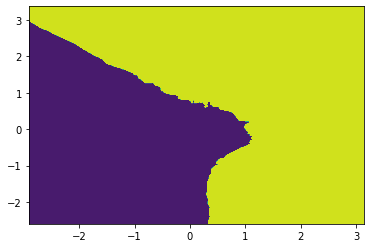

In [43]:
plt.contourf(XX, YY, output_arr.reshape(XX.shape)) #based on training data with small steps # binary classification # all dimension must be same to make contourf plot #f(x)= XX,YY #f(X) can be 0 or 1

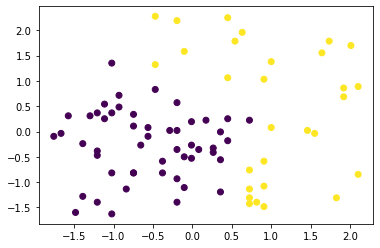

In [44]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred) # normal plot showing how knn classify that which person will buy or not buy # test data plot

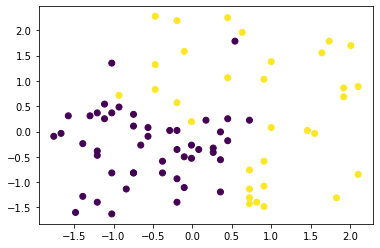

In [45]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test) # normal plot showing orginal which person will buy or not buy # test data


In [46]:
accuracy_score(Y_test, Y_pred)*100

93.75

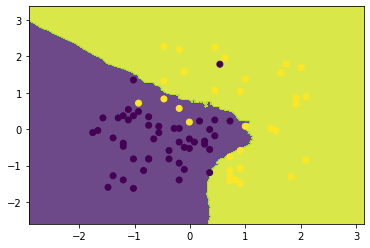

In [65]:
# ORIGINAL on test data
plt.contourf(XX, YY, output_arr.reshape(XX.shape), alpha=0.8)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test) # Actual datapoint are little potla :) ( like purple datapoint in green region (outlier) )

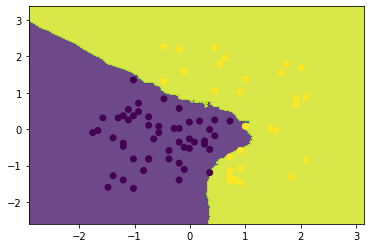

In [47]:
# PREDICTED on test data # Perfect Work by k nearest neigbour, with a little defect(because of outlier)
plt.contourf(XX, YY, output_arr.reshape(XX.shape), alpha=0.8)# alpha is for transparency
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred) # Removed the little potlaness :) using knn classification 

In [49]:
Y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [50]:
Y_test.values

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [51]:
mat= Y_test.values-Y_pred

In [52]:
mat.shape

(80,)

In [53]:
for i in range(0, mat.shape[0]):
   if mat[i] != 0:
        print ("i=",i,", Y_test[",i,"]=",Y_test.values[i],", Y_pred[",i,"]=",Y_pred[i])
        if Y_test.values[i] == 0:
            print ("Point should be in purple region but moved to green region ( Defect/Wrong Classification Of KNN )\n")
        else :
            print ("Point should be in green region but moved to yellow region ( Defect/Wrong Classification Of KNN )\n")

i= 20 , Y_test[ 20 ]= 1 , Y_pred[ 20 ]= 0
Point should be in green region but moved to yellow region ( Defect/Wrong Classification Of KNN )

i= 29 , Y_test[ 29 ]= 1 , Y_pred[ 29 ]= 0
Point should be in green region but moved to yellow region ( Defect/Wrong Classification Of KNN )

i= 35 , Y_test[ 35 ]= 1 , Y_pred[ 35 ]= 0
Point should be in green region but moved to yellow region ( Defect/Wrong Classification Of KNN )

i= 50 , Y_test[ 50 ]= 1 , Y_pred[ 50 ]= 0
Point should be in green region but moved to yellow region ( Defect/Wrong Classification Of KNN )

i= 58 , Y_test[ 58 ]= 0 , Y_pred[ 58 ]= 1
Point should be in purple region but moved to green region ( Defect/Wrong Classification Of KNN )



In [54]:
# Five point Differing out of 80 points, so accuracy (100-(5/80* 100))=(100-6.25)= 93.75%

# Effect of K on Decision Boundary

In [55]:
confusion_matrix(Y_test, Y_pred)

array([[47,  1],
       [ 4, 28]])

In [63]:
error_train= []
error_test= []

for k in range(1, 100):
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, Y_train)
    
    X= confusion_matrix(Y_train, knn.predict(X_train))
    Y= confusion_matrix(Y_test, knn.predict(X_test))
    
    error_train.append( (X[0][1]+ X[1][0])/ X.sum() ) # error rate 
    error_test.append( (Y[0][1]+ Y[1][0])/ Y.sum() ) # error rate 

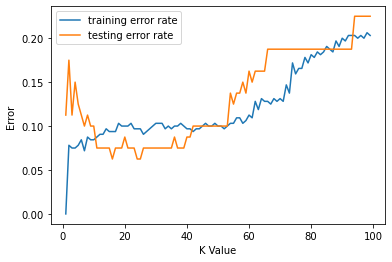

In [64]:
plt.plot(range(1, 100), error_train, label="training error rate")
plt.plot(range(1, 100), error_test,  label="testing error rate")
plt.xlabel("K Value")
plt.ylabel("Error ")
plt.legend()


### in the case of blue line ( based on training data ( seen to model )  )
- when the value of k is low error is minimum  ( overfitting ) // already known to model the correct class of the data point 

- when we increase the value of k then error increases because majority votes gives wrong answer 

### in the case of yellow line ( based on testing data ( unseen to model ) )
- when the value of k is low error is maximum ( as by only compairing with few neighbour will not help in classification )

-  when we increase the value of k then error decreases ( comparing with many other neighbours and applying majority rule to decides its own class )

### So we have  to pick the vlaue of k where both yellow and blue lines error are minimum  to find the optimal value of k for the current model 

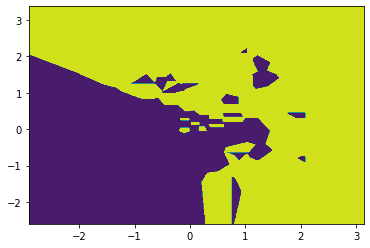

In [93]:
# k == 1 consider every minute details, that can be easly seen in contour decision boundary plot 
# overfitting # decision boundary is also harsh # unable to predict propper classification on new data  
for i in range(1,2):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    
    # min age to max age (scaled)
    a= np.arange(start=X_train[:, 0].min()-1,stop= X_train[:, 0].max()+1, step= 0.01) 
    
    # min salary to max salary (scaled)
    b= np.arange(start=X_train[:, 1].min()-1,stop= X_train[:, 1].max()+1, step= 0.01) 
    
    XX, YY= np.meshgrid(a, b)
    input_arr= np.array([XX.ravel(), YY.ravel()]).T
    output_arr= knn.predict(input_arr)
    
    plt.contourf(XX, YY, output_arr.reshape(XX.shape))

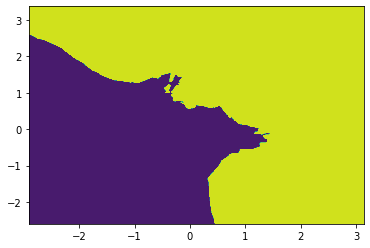

In [94]:
# decision boundary is also smooth and classification is almost binary 
# accuracy is much bettter near optimal 
for i in range(10, 11):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    
    # min age to max ege (scaled)
    a= np.arange(start=X_train[:, 0].min()-1,stop= X_train[:, 0].max()+1, step= 0.01) 
    
    # min salary to max slary (scaled)
    b= np.arange(start=X_train[:, 1].min()-1,stop= X_train[:, 1].max()+1, step= 0.01) 
    
    XX, YY= np.meshgrid(a, b)
    input_arr= np.array([XX.ravel(), YY.ravel()]).T
    output_arr= knn.predict(input_arr)
    
    plt.contourf(XX, YY, output_arr.reshape(XX.shape))

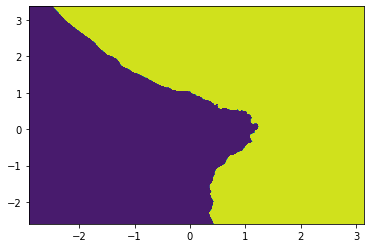

In [15]:
# decision boundary is also smooth but more towards underfiting 
# accuracy is not as bettter as previous 
# considering a larger amount of neighbour 
for i in range(40, 41):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    
    # min age to max ege (scaled)
    a= np.arange(start=X_train[:, 0].min()-1,stop= X_train[:, 0].max()+1, step= 0.01) 
    
    # min salary to max slary (scaled)
    b= np.arange(start=X_train[:, 1].min()-1,stop= X_train[:, 1].max()+1, step= 0.01) 
    
    XX, YY= np.meshgrid(a, b)
    input_arr= np.array([XX.ravel(), YY.ravel()]).T
    output_arr= knn.predict(input_arr)
    
    plt.contourf(XX, YY, output_arr.reshape(XX.shape))

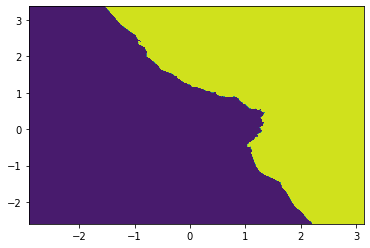

In [16]:
# decision boundary is also smooth but more more towards underfiting 
# accuracy is not as bettter as previous 
# considering a larger amount of neighbour and majority rule
for i in range(80, 81):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    
    # min age to max ege (scaled)
    a= np.arange(start=X_train[:, 0].min()-1,stop= X_train[:, 0].max()+1, step= 0.01) 
    
    # min salary to max slary (scaled)
    b= np.arange(start=X_train[:, 1].min()-1,stop= X_train[:, 1].max()+1, step= 0.01) 
    
    XX, YY= np.meshgrid(a, b)
    input_arr= np.array([XX.ravel(), YY.ravel()]).T
    output_arr= knn.predict(input_arr)
    
    plt.contourf(XX, YY, output_arr.reshape(XX.shape))

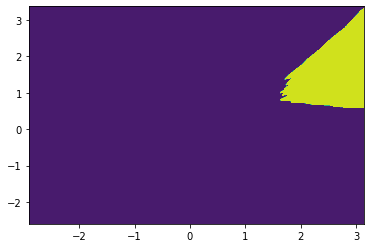

In [28]:
# underfiting 
for i in range(200, 201):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    
    # min age to max ege (scaled)
    a= np.arange(start=X_train[:, 0].min()-1,stop= X_train[:, 0].max()+1, step= 0.01) 
    
    # min salary to max slary (scaled)
    b= np.arange(start=X_train[:, 1].min()-1,stop= X_train[:, 1].max()+1, step= 0.01) 
    
    XX, YY= np.meshgrid(a, b)
    input_arr= np.array([XX.ravel(), YY.ravel()]).T
    output_arr= knn.predict(input_arr)
    
    plt.contourf(XX, YY, output_arr.reshape(XX.shape))